In [2]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm as tqdm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import seaborn as sns
from gensim.models import Word2Vec

In [3]:
os.getcwd()

'C:\\Users\\raghvendra.pal\\Downloads\\git\\stg.poc.2020.surveillance.ml-basics.786014\\02-classification'

In [4]:
PATH = '../BBCSports/bbcsport-fulltext-asis/bbcsport/'
classes = os.listdir(PATH)
classes.remove('README.TXT')

In [5]:
print(classes)

['athletics', 'cricket', 'football', 'rugby', 'tennis']


In [6]:
print("There are {} classes present for the BBC sports dataset".format(len(classes)))

There are 5 classes present for the BBC sports dataset


In [7]:
classes

['athletics', 'cricket', 'football', 'rugby', 'tennis']

In [8]:
PATH+classes[0]

'../BBCSports/bbcsport-fulltext-asis/bbcsport/athletics'

In [9]:
class_data = os.listdir(PATH+classes[0])

In [10]:
class_data[2]

'003.txt'

In [11]:
len(class_data)

101

In [12]:
PATH+classes[0]+"/"+class_data[0]

'../BBCSports/bbcsport-fulltext-asis/bbcsport/athletics/001.txt'

In [13]:
file1 = open(PATH+classes[0]+"/"+class_data[0],"r")

In [14]:
file1.read()

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [15]:
text_list = []
class_list = []
class_num = []
for SPORT in tqdm(classes):
    for FILE_NAME in os.listdir(PATH+SPORT):
        file1 = open(PATH+SPORT+"/"+FILE_NAME,"r")
        text_list.append(file1.read())
        class_list.append(SPORT)
        class_num.append(classes.index(SPORT))

In [16]:
print("Length of Text Data : ", len(text_list))
print("Length of Class Data : ", len(class_list))
print("Length of Number Class Data : ", len(class_num))

Length of Text Data :  737
Length of Class Data :  737
Length of Number Class Data :  737


In [17]:
data_dict = {'Text':text_list,'Category':class_list, 'Class': class_num}
data  = pd.DataFrame(data_dict)

In [18]:
data.head()

,Text,Category,Class
0,Claxton hunting first major medal\n\nBritish h...,athletics,0
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,0
2,Greene sets sights on world title\n\nMaurice G...,athletics,0
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,0
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,0


In [19]:
data.iloc[101:110]

,Text,Category,Class
101,Hayden sets up Australia win\n\nSecond one-day...,cricket,1
102,Pietersen gives England a chance\n\nLunch: Eng...,cricket,1
103,South Africa far too strong again\n\nSecond on...,cricket,1
104,Pakistan on revenge mission\n\nPakistan's cric...,cricket,1
105,Russell to instruct keeper Jones\n\nFormer Eng...,cricket,1
106,England A roll to second victory\n\nOne-day to...,cricket,1
107,Kaif absence wrong - Azharuddin\n\nIndia were ...,cricket,1
108,Bracewell worried by Lee\n\nNew Zealand coach ...,cricket,1
109,Pakistan accept venues compromise\n\nThe doubt...,cricket,1


In [20]:
data.iloc[225:235]

,Text,Category,Class
225,Man Utd stroll to Cup win\n\nWayne Rooney made...,football,2
226,Van Nistelrooy set to return\n\nManchester Uni...,football,2
227,Moyes U-turn on Beattie dismissal\n\nEverton m...,football,2
228,Ronaldo considering new contract\n\nManchester...,football,2
229,Smith keen on Home series return\n\nScotland m...,football,2
230,Mido makes third apology\n\nAhmed 'Mido' Hossa...,football,2
231,Man City 0-2 Man Utd\n\nManchester United redu...,football,2
232,Gerrard plays down European hopes\n\nSteven Ge...,football,2
233,Duff ruled out of Barcelona clash\n\nChelsea's...,football,2
234,Chelsea clinch cup in extra-time\n\n(after ext...,football,2


In [21]:
data.iloc[490:500]

,Text,Category,Class
490,Hodgson shoulders England blame\n\nFly-half Ch...,rugby,3
491,Vickery out of Six Nations\n\nEngland tight-he...,rugby,3
492,Yachvili savours France comeback\n\nFrance scr...,rugby,3
493,Laporte tinkers with team\n\nFrance coach Bern...,rugby,3
494,Lewsey puzzle over disallowed try\n\nEngland's...,rugby,3
495,Fuming Robinson blasts officials\n\nEngland co...,rugby,3
496,O'Gara revels in Ireland victory\n\nIreland fl...,rugby,3
497,Thomas out of Six Nations\n\nWales captain Gar...,rugby,3
498,Wales coach elated with win\n\nMike Ruddock pa...,rugby,3
499,Newcastle 27-27 Gloucester\n\nNewcastle centre...,rugby,3


In [22]:
data.iloc[637:647]

,Text,Category,Class
637,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis,4
638,Safin slumps to shock Dubai loss\n\nMarat Safi...,tennis,4
639,Ferrero eyes return to top form\n\nFormer worl...,tennis,4
640,Roddick into San Jose final\n\nAndy Roddick wi...,tennis,4
641,Federer claims Dubai crown\n\nWorld number one...,tennis,4
642,Young debut cut short by Ginepri\n\nFifteen-ye...,tennis,4
643,Melzer shocks Agassi\n\nSecond seed Andre Agas...,tennis,4
644,Federer forced to dig deep\n\nTop seed Roger F...,tennis,4
645,Nadal marches on in Mexico\n\nRafael Nadal con...,tennis,4
646,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis,4


In [23]:
data['Category'].value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: Category, dtype: int64

In [24]:
data['Class'].value_counts()

2    265
3    147
1    124
0    101
4    100
Name: Class, dtype: int64

In [25]:
data.iloc[0,0]

'Claxton hunting first major medal\n\nBritish hurdler Sarah Claxton is confident she can win her first major medal at next month\'s European Indoor Championships in Madrid.\n\nThe 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.\n\nFor the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous

In [26]:
print(data.iloc[0,0])
print(100*'=')
print(data.iloc[100,0])
print(100*'=')
print(data.iloc[200,0])
print(100*'=')
print(data.iloc[300,0])
print(100*'=')

Claxton hunting first major medal

British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.

The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.

For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons,

In [27]:
data_unique = data.groupby(data.columns.tolist()).Class.agg('count').to_frame('Count').reset_index()

In [28]:
print("Number of duplicate rows in Data are : ",len(data)-len(data_unique))

Number of duplicate rows in Data are :  10


In [29]:
data_unique[data_unique.Count>1]

,Text,Category,Class,Count
76,Bortolami predicts dour contest\n\nItaly skipp...,rugby,3,2
174,Edwards tips Idowu for Euro gold\n\nWorld outd...,athletics,0,2
223,Ferguson rues failure to cut gap\n\nBoss Sir A...,football,2,2
262,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis,4,2
263,Harbhajan action given all-clear\n\nIndian spi...,cricket,1,2
302,Holmes starts 2005 with GB events\n\nKelly Hol...,athletics,0,2
317,India's top six secure - Ganguly\n\nCaptain So...,cricket,1,2
340,Jayasuriya set to join Somerset\n\nSomerset ar...,cricket,1,2
446,Moyes U-turn on Beattie dismissal\n\nEverton m...,football,2,2
606,Spain coach faces racism inquiry\n\nSpain's Fo...,football,2,2


In [30]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"shan't", "shall not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase


In [31]:
stopWords = set(stopwords.words('english'))

In [32]:
print(stopWords)

{'out', 'him', 'her', 'over', 'himself', 'that', 'this', 'doing', 'during', 'o', 'do', 'no', 'wouldn', 'these', 's', 'between', 'again', 'ours', "aren't", 'very', "haven't", 'she', 'because', 'of', 'only', 'ourselves', 're', 'shan', 'into', 'not', 'theirs', 'what', 'both', 'have', "it's", 'about', 'before', "mightn't", 'ma', 'through', 'weren', 'then', "you'd", 'how', 'some', 've', 'such', 'should', 'had', 'than', 'didn', 'aren', 'why', 'at', 'is', 'itself', 'we', 'most', 'against', 'their', 'ain', "isn't", 'those', 'myself', 'here', "weren't", 'off', "you'll", 'your', "don't", "you're", 'they', 'our', 'the', "you've", 'hers', "wouldn't", 'which', 'won', 'hadn', 'being', 'are', 'be', 'or', 'for', "needn't", "shouldn't", 'haven', "doesn't", 'down', 'and', 't', 'more', 'from', "couldn't", 'was', 'mightn', 'shouldn', 'but', 'd', 'my', 'themselves', 'when', 'own', 'just', 'm', 'y', 'as', 'all', 'by', 'will', 'll', 'further', 'yours', 'am', 'so', 'with', 'has', 'other', 'it', 'i', 'while', 

In [33]:
# stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
# "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
# 'himself', \
# 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
# 'their',\
# 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', \
# 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
# 'do', 'does', \
# 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
# 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
# 'before', 'after',\
# 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under'
# , 'again', 'further',\
# 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
# 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
# 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll'
# , 'm', 'o', 're', \
# 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
# "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
# "mightn't", 'mustn',\
# "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", \
# 'won', "won't", 'wouldn', "wouldn't"])


In [34]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

porter = PorterStemmer()
preprocessed_data = []
# tqdm is for printing the status bar
for sentance in tqdm(data_unique['Text'].values):

#     sentance = decontracted(sentance)
    #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(porter.stem(e.lower()) for e in sentance.split() if e.lower() not in stopWords)
    preprocessed_data.append(sentance.strip())


### Before Stemming

In [35]:
list(data_unique.loc[:9, 'Text'])

["2004 - A year to remember\n\nClub football in South America continues to suffer from the continent's economic crisis.\n\nThe best players are lured across the Atlantic - 900 players left Brazil alone in 2004. And crowds are low, with money tight and the fear of violence proving a powerful incentive to stay at home. The average attendance in this year's Brazilian Championship was a record low of 8,139. Furthermore, in 2004 no new talent exploded on the continent with quite the same force as Diego, Robinho and Carlos Tevez in the two previous years. There is no doubt that the highlight of South America's footballing year has to come from the international game. There were some dramatic tournaments in 2004. The Copa America, held in Peru last July, could hardly have come to a more exciting conclusion. With the last kick of the final Brazil scored one of the most decisive equalising goals in the history of football.\n\nArgentina thought they had the game won and were in no state to take 

### After Stemming 

In [36]:
preprocessed_data[:10]

['year rememb club footbal south america continu suffer contin econom crisi best player lure across atlant player left brazil alon crowd low money tight fear violenc prove power incent stay home averag attend year brazilian championship record low furthermor new talent explod contin quit forc diego robinho carlo tevez two previou year doubt highlight south america footbal year come intern game dramat tournament copa america held peru last juli could hardli come excit conclus last kick final brazil score one decis equalis goal histori footbal argentina thought game state take penalti adriano blast forc shoot earlier year intens disappoint brazil amazingli fail qualifi olymp footbal tournament gold medal titl lack wait four year miss two qualif slot grab south america championship held chile januari argentina paraguay made went secur gold silver athen tournament terrif real highlight year south american footbal could come world cup qualif campaign reason time great player come back home 

In [37]:
data_unique['preprocessed_data'] = preprocessed_data

In [38]:
data_unique.head()

,Text,Category,Class,Count,preprocessed_data
0,2004 - A year to remember\n\nClub football in ...,football,2,1,year rememb club footbal south america continu...
1,2004: An Irish Athletics Year\n\n2004 won't be...,athletics,0,1,irish athlet year rememb one irish athlet grea...
2,"A November to remember\n\nLast Saturday, one n...",rugby,3,1,novemb rememb last saturday one newspap procla...
3,A need to limit foreign numbers\n\nWith all th...,football,2,1,need limit foreign number top club vy titl cha...
4,A year to remember for Irish\n\nThere used to ...,rugby,3,1,year rememb irish use one sublimin moment year...


In [39]:
data_unique.iloc[101:110]

,Text,Category,Class,Count,preprocessed_data
101,Castaignede fires Laporte warning\n\nFormer Fr...,rugby,3,1,castaigned fire laport warn former franc fli h...
102,Cech sets clean-sheet benchmark\n\nChelsea's P...,football,2,1,cech set clean sheet benchmark chelsea petr ce...
103,Celtic make late bid for Bellamy\n\nNewcastle ...,football,2,1,celtic make late bid bellami newcastl striker ...
104,Celtic unhappy over Bulgaria date\n\nMartin O'...,football,2,1,celtic unhappi bulgaria date martin neill hope...
105,Celts savour Grand Slam prospect\n\nThe Six Na...,rugby,3,1,celt savour grand slam prospect six nation her...
106,Charlton 1-2 Liverpool\n\nFernando Morientes g...,football,2,1,charlton liverpool fernando morient grab first...
107,Charvis set to lose fitness bid\n\nFlanker Col...,rugby,3,1,charvi set lose fit bid flanker colin charvi u...
108,Chelsea 3-0 Portsmouth\n\nDidier Drogba scored...,football,2,1,chelsea portsmouth didier drogba score twice l...
109,Chelsea clinch cup in extra-time\n\n(after ext...,football,2,1,chelsea clinch cup extra time extra time score...


In [40]:
data_unique.iloc[225:235]

,Text,Category,Class,Count,preprocessed_data
225,Ferrero eyes return to top form\n\nFormer worl...,tennis,4,1,ferrero eye return top form former world numbe...
226,Fifa agrees goal-line technology\n\nFifa is ex...,football,2,1,fifa agre goal line technolog fifa expect use ...
227,Finnan says Irish can win group\n\nSteve Finna...,football,2,1,finnan say irish win group steve finnan believ...
228,Fit-again Betsen in France squad\n\nFrance hav...,rugby,3,1,fit betsen franc squad franc brought flanker s...
229,Flintoff fit to bowl at Wanderers\n\nFourth Te...,cricket,1,1,flintoff fit bowl wander fourth test wander so...
230,Flintoff fit to bowl at Wanderers\n\nFourth Te...,cricket,1,1,flintoff fit bowl wander fourth test wander so...
231,"France v Wales (Sat)\n\nStade de France, Paris...",rugby,3,1,franc v wale sat stade de franc pari saturday ...
232,Freeman considers return to track\n\nFormer Ol...,athletics,0,1,freeman consid return track former olymp champ...
233,Fuming Robinson blasts officials\n\nEngland co...,rugby,3,1,fume robinson blast offici england coach andi ...
234,Fuming Robinson blasts officials\n\nEngland co...,rugby,3,1,fume robinson blast offici england coach andi ...


In [41]:
data_unique['Category'].value_counts()

football     262
rugby        146
cricket      121
tennis        99
athletics     99
Name: Category, dtype: int64

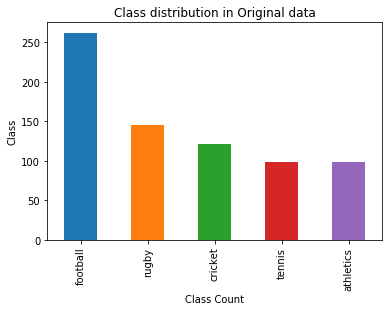

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
data_unique['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Original data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
X, X_test = train_test_split(data_unique, test_size=0.05, random_state=42)
X_train, X_val = train_test_split(X, test_size=0.05, random_state=42)

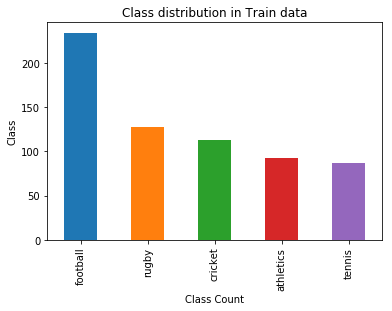

In [115]:
X_train['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Train data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

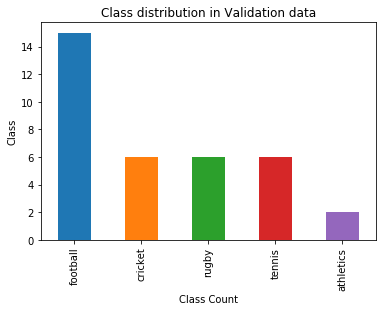

In [116]:
X_val['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Validation data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

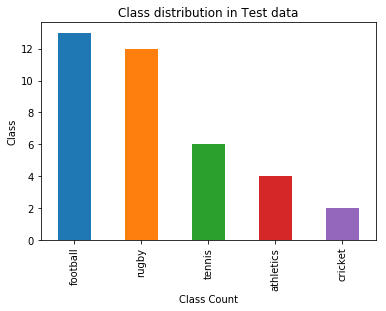

In [117]:
X_test['Category'].value_counts().plot(kind='bar')
plt.title('Class distribution in Test data')
plt.xlabel('Class Count')
plt.ylabel('Class')
plt.show()

In [118]:
print("Shape of Train Data      : ",X_train.shape)
print("Shape of Validation Data : ",X_val.shape)
print("Shape of Test Data       : ",X_test.shape)

Shape of Train Data      :  (655, 5)
Shape of Validation Data :  (35, 5)
Shape of Test Data       :  (37, 5)


In [119]:
#BoW
count_vect = CountVectorizer(max_df = 70, min_df = 10, max_features = 3000) #in scikit-learn
count_vect.fit(X_train['preprocessed_data'])
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)
final_counts = count_vect.transform(X_train['preprocessed_data'])
final_cv = count_vect.transform(X_val['preprocessed_data'])
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])


some feature names  ['aaa', 'ab', 'abdul', 'abil', 'abl', 'absenc', 'absolut', 'ac', 'accept', 'accid']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (655, 1469)
the number of unique words  1469


In [337]:
# sorted([(key, value) for key, value in count_vect.vocabulary_.items()], key = lambda x: x[1], reverse = True)

# print(sorted(count_vect.vocabulary_, reverse = True))
# print(final_counts.toarray())

### TF-IDF

In [334]:
tf_idf_vect = TfidfVectorizer(max_df = 70, min_df = 10, max_features = 3000)
tf_idf_vect.fit(X_train['preprocessed_data'])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf_train = tf_idf_vect.transform(X_train['preprocessed_data'])
final_tf_idf_cv = tf_idf_vect.transform(X_val['preprocessed_data'])
print("the type of count vectorizer ",type(final_tf_idf_train))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_train.get_shape()[1])

some sample features(unique words in the corpus) ['aaa', 'ab', 'abdul', 'abil', 'abl', 'absenc', 'absolut', 'ac', 'accept', 'accid']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (655, 1469)
the number of unique words including both unigrams and bigrams  1469


In [338]:
# sorted([(key, value) for key, value in tf_idf_vect.vocabulary_.items()], key = lambda x: x[1], reverse = True)

# Applying Model

### Decision Trees :

In [339]:
max_depth = [1,5,10,50,500,1000]
min_samples_split = [5,10,100,500]

# Train on Unigram Data

In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [341]:
def learning_best_hyperparameter(train_data, cv_data):
    train_accuracy = np.zeros((len(max_depth), len(min_samples_split)))
    val_accuracy = np.zeros((len(max_depth), len(min_samples_split)))
    train_loss = np.zeros((len(max_depth), len(min_samples_split)))
    val_loss = np.zeros((len(max_depth), len(min_samples_split)))
    for depth in tqdm(range(len(max_depth))):
        for split in range(len(min_samples_split)):
            model = DecisionTreeClassifier(max_depth=max_depth[depth], min_samples_split = min_samples_split[split])
            model.fit(train_data, X_train['Class'].values)
            predicted_classes = model.predict(train_data)
            predicted_val_classes = model.predict(cv_data)
            accuracy_train = accuracy_score(X_train['Class'].values.flatten(),predicted_classes)
            accuracy_cv = accuracy_score(X_val['Class'].values.flatten(),predicted_val_classes)
            train_accuracy[depth][split] = accuracy_train
            val_accuracy[depth][split] = accuracy_cv
            train_loss[depth][split] = 1 - accuracy_train
            val_loss[depth][split] = 1 - accuracy_cv
    return train_accuracy, val_accuracy, train_loss, val_loss

In [342]:
train_accuracy, val_accuracy, train_loss, val_loss = learning_best_hyperparameter(final_counts, final_cv)

## Graph

In [343]:
def plot_graph(train, val, title_train, title_val):
    df_train = pd.DataFrame(train, columns = min_samples_split, index = max_depth)
    df_val = pd.DataFrame(val, columns = min_samples_split, index = max_depth)
    sns.heatmap(df_train, annot = True, fmt = "g", cmap = "viridis")
    plt.xlabel('Sample Split')
    plt.ylabel('Depth')
    plt.title(title_train)
    plt.show()
    
    sns.heatmap(df_val, annot = True, fmt = "g", cmap = "viridis")
    plt.xlabel('Sample Split')
    plt.ylabel('Depth')
    plt.title(title_val)
    plt.show()

### Accuracy Graph 

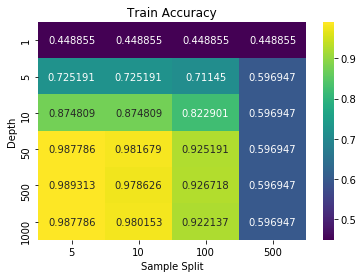

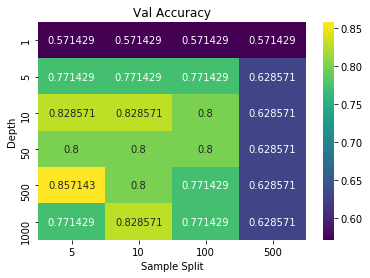

In [344]:
plot_graph(train_accuracy, val_accuracy, "Train Accuracy", "Val Accuracy")

### Loss Graph

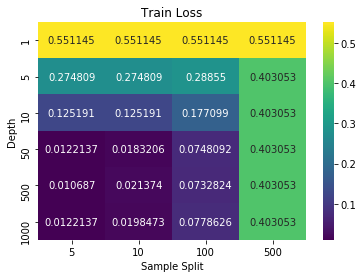

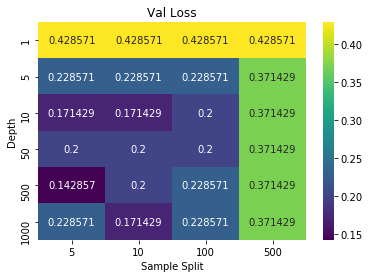

In [345]:
plot_graph(train_loss, val_loss, "Train Loss", "Val Loss")

### Predicting on Test Data

In [346]:
def training_best_model(max_depth, min_samples_split, vectorizer, train):
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split = min_samples_split)
    model.fit(train, X_train['Class'].values)
    predicted_test_classes = model.predict(vectorizer.transform(X_test['preprocessed_data']))
    predicted_category = [classes[index] for index in predicted_test_classes]
    accuracy = accuracy_score(X_test['Class'].values.flatten(),predicted_test_classes)
    return model, predicted_test_classes, predicted_category, accuracy

In [347]:
model, predicted_test_classes, predicted_category, accuracy = training_best_model(50, 5, count_vect, final_counts)

In [348]:
from graphviz import Source
from sklearn import tree
export_graphviz(model, out_file = 'Decision_tree_bow_export.dot',feature_names=count_vect.get_feature_names(), class_names = classes)

In [349]:
print("Getting {} % Accuracy on test Data".format(round(accuracy*100,2)) )

Getting 89.19 % Accuracy on test Data


### Confusion Matrix

In [350]:
print(classification_report(X_test['Class'].values.flatten(),predicted_test_classes))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         4
          1       1.00      1.00      1.00         2
          2       0.87      1.00      0.93        13
          3       1.00      0.67      0.80        12
          4       1.00      1.00      1.00         6

avg / total       0.92      0.89      0.89        37



In [351]:
import itertools
# Plotting Confusion matrix to know How much data is correctly and incorrectly predicted by our model.

def plot_confusion_matrix(cm, classes=['athletics', 'cricket', 'football', 'rugby', 'tennis'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [352]:
X_test['Category'].value_counts()

football     13
rugby        12
tennis        6
athletics     4
cricket       2
Name: Category, dtype: int64

Confusion matrix, without normalization
Normalized confusion matrix


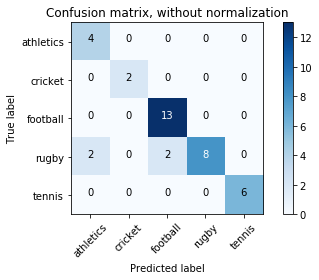

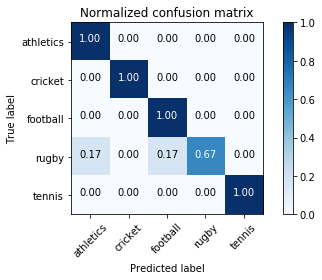

In [353]:
cnf_matrix  = confusion_matrix(X_test['Class'].values.flatten(),predicted_test_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [354]:
test_data_result = pd.DataFrame({'Text':X_test['preprocessed_data'],'Category':predicted_category})

In [355]:
test_data_result.head()

,Text,Category
513,poll explain free kick decis refere graham pol...,football
693,wenger step row arsen wenger step feud sir ale...,football
377,kuznetsova fail drug test us open champion sve...,tennis
33,australia unchang pakistan australia name unch...,cricket
63,benitez delight crucial win liverpool manag ra...,football


In [356]:
X_test['Unigram_Predicted_Test'] = predicted_test_classes
X_test['Unigram_Predicted_Test_Category'] = predicted_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [357]:
X_test.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
513,Poll explains free-kick decision\n\nReferee Gr...,football,2,1,poll explain free kick decis refere graham pol...,2,football,2,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,football,2,1,wenger step row arsen wenger step feud sir ale...,2,football,1,cricket
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,tennis,4,1,kuznetsova fail drug test us open champion sve...,4,tennis,4,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,cricket,1,1,australia unchang pakistan australia name unch...,1,cricket,1,cricket
63,Benitez delight after crucial win\n\nLiverpool...,football,2,1,benitez delight crucial win liverpool manag ra...,2,football,2,football


In [358]:
X_test_not_equal = X_test[X_test['Class'] != X_test['Unigram_Predicted_Test']]

In [359]:
print("Shape of Wrong Data : ",X_test_not_equal.shape)

Shape of Wrong Data :  (4, 9)


In [360]:
X_test_not_equal

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
388,Lewsey puzzle over disallowed try\n\nEngland's...,rugby,3,1,lewsey puzzl disallow tri england josh lewsey ...,2,football,3,rugby
707,Williams stays on despite dispute\n\nMatt Will...,rugby,3,1,william stay despit disput matt william insist...,0,athletics,3,rugby
210,Farrell saga to drag on - Lindsay\n\nWigan cha...,rugby,3,1,farrel saga drag lindsay wigan chairman mauric...,0,athletics,0,athletics
449,Murphy: That was a bruising battle\n\nThat's w...,rugby,3,1,murphi bruis battl call tough game physic fair...,2,football,2,football


In [361]:
test_data_result = pd.DataFrame({'Text':X_test['Text'], 'Pre-Processed Text':X_test['preprocessed_data'], 'Actual Category':X_test['Category'], 'Predicted Category':X_test['Unigram_Predicted_Test_Category']})

In [362]:
test_data_result.to_csv('test_result_bow_unigram_dt.csv')

### Predicting on Future Unseen Text Data

In [363]:
PATH = '../BBCSports/bbcsport-fulltext-single/data/'

In [364]:
def testing_data(path, model, vectorizer):
    test_files = os.listdir(path)
    test_files.remove('.ipynb_checkpoints')
    test_data = []
    for FILE_NAME in test_files:
        file1 = open(path+FILE_NAME,"r")
        test_data.append(file1.read())
    preprocessed_data_test = []
    # tqdm is for printing the status bar
    for sentance in tqdm(test_data):

    #     sentance = decontracted(sentance)
        #remove words with numbers python: https://stackoverflow.com/a/18082370/4084039
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = re.sub('[^A-Za-z]+', ' ', sentance)
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(porter.stem(e.lower()) for e in sentance.split() if e.lower() not in stopWords)
        preprocessed_data_test.append(sentance.strip())
    predicted_on_unseen_classes = model.predict(vectorizer.transform(preprocessed_data_test))
    predicted_category = [classes[index] for index in predicted_on_unseen_classes]
    data_dict_test = {'Text':test_data,'Category':predicted_category}
    data_test  = pd.DataFrame(data_dict_test)
    return data_test

In [365]:
result_unseen_data_test = testing_data(PATH, model, count_vect)

In [366]:
result_unseen_data_test.head()

,Text,Category
0,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis
1,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis
2,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
3,Hayden sets up Australia win\n\nSecond one-day...,cricket
4,Pietersen gives England a chance\n\nLunch: Eng...,cricket


In [367]:
result_unseen_data_test.to_csv('result_bow_unigram_dt.csv')

## Train on TF-IDF data

In [368]:
train_accuracy, val_accuracy, train_loss, val_loss = learning_best_hyperparameter(final_tf_idf_train, final_tf_idf_cv)

### Accuracy Graph

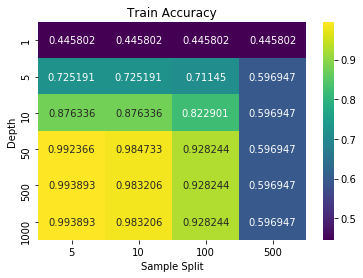

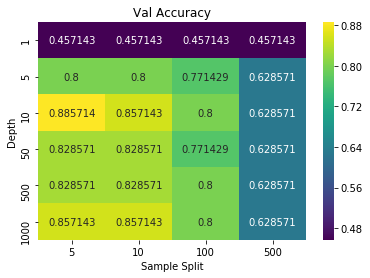

In [369]:
plot_graph(train_accuracy, val_accuracy, "Train Accuracy", "Val Accuracy")

### Loss Graph

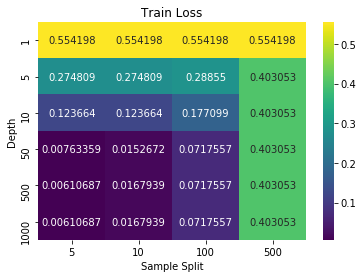

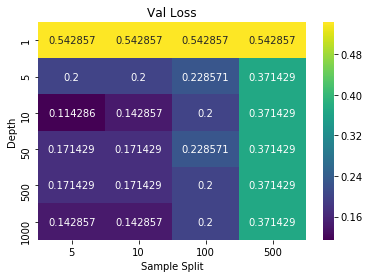

In [370]:
plot_graph(train_loss, val_loss, "Train Loss", "Val Loss")

### Predicting on Test Data

In [377]:
model, predicted_test_classes, predicted_category, accuracy = training_best_model(1000, 5, tf_idf_vect, final_tf_idf_train)

In [378]:
export_graphviz(model, out_file ='Decision_tree_tfidf_export.dot',feature_names=tf_idf_vect.get_feature_names(), class_names = classes)

In [379]:
print("Getting {} % Accuracy on test Data".format(round(accuracy*100,2)) )

Getting 83.78 % Accuracy on test Data


In [380]:
print(classification_report(X_test['Class'].values.flatten(),predicted_test_classes))

             precision    recall  f1-score   support

          0       0.67      1.00      0.80         4
          1       0.67      1.00      0.80         2
          2       0.85      0.85      0.85        13
          3       1.00      0.67      0.80        12
          4       0.86      1.00      0.92         6

avg / total       0.87      0.84      0.84        37



Confusion matrix, without normalization
Normalized confusion matrix


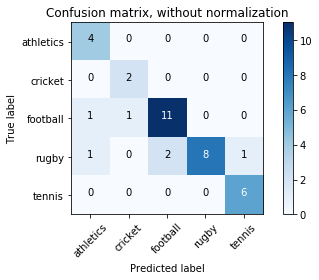

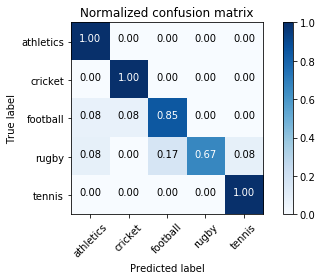

In [381]:
cnf_matrix  = confusion_matrix(X_test['Class'].values.flatten(),predicted_test_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,  normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [382]:
test_data_result = pd.DataFrame({'Text':X_test['preprocessed_data'],'Category':predicted_category})

In [383]:
test_data_result.head()

,Text,Category
513,poll explain free kick decis refere graham pol...,football
693,wenger step row arsen wenger step feud sir ale...,football
377,kuznetsova fail drug test us open champion sve...,tennis
33,australia unchang pakistan australia name unch...,cricket
63,benitez delight crucial win liverpool manag ra...,football


In [384]:
X_test['TFIDF_Predicted_Test'] = predicted_test_classes
X_test['TFIDF_Predicted_Test_Category'] = predicted_category

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [385]:
X_test.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
513,Poll explains free-kick decision\n\nReferee Gr...,football,2,1,poll explain free kick decis refere graham pol...,2,football,2,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,football,2,1,wenger step row arsen wenger step feud sir ale...,2,football,2,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,tennis,4,1,kuznetsova fail drug test us open champion sve...,4,tennis,4,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,cricket,1,1,australia unchang pakistan australia name unch...,1,cricket,1,cricket
63,Benitez delight after crucial win\n\nLiverpool...,football,2,1,benitez delight crucial win liverpool manag ra...,2,football,2,football


In [386]:
X_test_not_equal = X_test[X_test['Class'] != X_test['TFIDF_Predicted_Test']]

In [387]:
print("Shape of Wrong Data : ",X_test_not_equal.shape)

Shape of Wrong Data :  (6, 9)


In [388]:
X_test_not_equal.head()

,Text,Category,Class,Count,preprocessed_data,Unigram_Predicted_Test,Unigram_Predicted_Test_Category,TFIDF_Predicted_Test,TFIDF_Predicted_Test_Category
388,Lewsey puzzle over disallowed try\n\nEngland's...,rugby,3,1,lewsey puzzl disallow tri england josh lewsey ...,2,football,2,football
707,Williams stays on despite dispute\n\nMatt Will...,rugby,3,1,william stay despit disput matt william insist...,0,athletics,2,football
210,Farrell saga to drag on - Lindsay\n\nWigan cha...,rugby,3,1,farrel saga drag lindsay wigan chairman mauric...,0,athletics,0,athletics
449,Murphy: That was a bruising battle\n\nThat's w...,rugby,3,1,murphi bruis battl call tough game physic fair...,2,football,4,tennis
97,Cantona issues Man Utd job hint\n\nFormer Manc...,football,2,1,cantona issu man utd job hint former manchest ...,2,football,0,athletics


In [389]:
test_data_result = pd.DataFrame({'Text':X_test['Text'], 'Pre-Processed Text':X_test['preprocessed_data'], 'Actual Category':X_test['Category'], 'Predicted Category':X_test['TFIDF_Predicted_Test_Category']})

In [390]:
test_data_result

,Text,Pre-Processed Text,Actual Category,Predicted Category
513,Poll explains free-kick decision\n\nReferee Gr...,poll explain free kick decis refere graham pol...,football,football
693,Wenger steps up row\n\nArsene Wenger has stepp...,wenger step row arsen wenger step feud sir ale...,football,football
377,Kuznetsova 'failed a drugs test'\n\nUS Open ch...,kuznetsova fail drug test us open champion sve...,tennis,tennis
33,Australia unchanged for Pakistan\n\nAustralia ...,australia unchang pakistan australia name unch...,cricket,cricket
63,Benitez delight after crucial win\n\nLiverpool...,benitez delight crucial win liverpool manag ra...,football,football
467,O'Driscoll concern at Fifa ruling\n\nBournemou...,driscol concern fifa rule bournemouth boss sea...,football,football
346,Johnson too strong for GB runners\n\nBritain's...,johnson strong gb runner britain kathi butler ...,athletics,athletics
511,Player burn-out worries Robinson\n\nEngland co...,player burn worri robinson england coach andi ...,rugby,rugby
148,Davenport hits out at Wimbledon\n\nWorld numbe...,davenport hit wimbledon world number one linds...,tennis,tennis
388,Lewsey puzzle over disallowed try\n\nEngland's...,lewsey puzzl disallow tri england josh lewsey ...,rugby,football


In [391]:
test_data_result.to_csv('test_result_tf_idf_dt.csv')

### Predicting on Future Unseen Text Data

In [392]:
PATH = '../BBCSports/bbcsport-fulltext-single/data/'

In [393]:
result_unseen_data_test = testing_data(PATH, model, tf_idf_vect)

In [394]:
result_unseen_data_test.head()

,Text,Category
0,Henman overcomes rival Rusedski\n\nTim Henman ...,tennis
1,Hantuchova in Dubai last eight\n\nDaniela Hant...,tennis
2,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
3,Hayden sets up Australia win\n\nSecond one-day...,cricket
4,Pietersen gives England a chance\n\nLunch: Eng...,cricket


In [395]:
result_unseen_data_test.to_csv('result_tf_idf_dt.csv')

## Summary :

In [396]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Accuracy"]

x.add_row(["BOW", "89.19 %"])
x.add_row(["TF-IDF", "83.78 %"])


print(x)

+--------+----------+
| Model  | Accuracy |
+--------+----------+
|  BOW   | 89.19 %  |
| TF-IDF | 83.78 %  |
+--------+----------+


### From the table We can see that BOW gives good result on Test Data So we can take BOW  as our Base Vectorizer for further prediction.